In [40]:
import pandas as pd


In [39]:
series =pd.Series([10,20,30,40],index=['a','b','c','d'])
print(series)

a    10
b    20
c    30
d    40
dtype: int64


In [ ]:
series.shape,series.ndim,series.size

((4,), 1, 4)

In [ ]:
df=pd.DataFrame({"A":[1,2,3,4,5],"B":[6,7,8,9,10]},index=['a','b','c','d','e'])
print(df)

   A   B
a  1   6
b  2   7
c  3   8
d  4   9
e  5  10


In [ ]:
df.shape,df.ndim,df.size

((5, 2), 2, 10)

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data/data.csv")
# df.head()
df.head(3)


,x,y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382


In [ ]:
df.tail()

,x,y
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958
99,25.128485,53.454394


In [ ]:
df.shape,df.size

((100, 2), 200)

In [ ]:
df.columns

Index(['x', 'y'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
df.describe()

,x,y
count,100.000000,100.000000
mean,48.958341,72.735051
std,9.746379,16.658187
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,118.591217


In [ ]:
# df.isnull()
df.isnull().sum()
# 00 output means no null value

,0
x,0
y,0


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()  # Load the Iris dataset
# Remove trailing spaces from keys
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=iris['feature_names'] + ['target'])
np.random.seed(42)  # Introduce missing values randomly
mask = np.random.rand(*iris_df.shape) < 0.1  # 10%
iris_df[mask] = np.nan
print("Missing Values in Iris Dataset:")
print(iris_df.isnull().sum())

Missing Values in Iris Dataset:
sepal length (cm)    15
sepal width (cm)     15
petal length (cm)    19
petal width (cm)     15
target               19
dtype: int64


In [ ]:
iris_df_ffill = iris_df.ffill()
iris_df_mean = iris_df.fillna(iris_df.mean())
iris_df_median = iris_df.fillna(iris_df.median())
iris_df_zero = iris_df.fillna(0)

# Expand iris_df with filled columns, using correct quotation marks
iris_df_expanded = pd.concat([iris_df,
                              iris_df_ffill.add_suffix('_ffill'),
                              iris_df_mean.add_suffix('_mean'),
                              iris_df_median.add_suffix('_median'),
                              iris_df_zero.add_suffix('_zero')],
                             axis=1)

# Display the head of the expanded DataFrame
print("\nDataset after Filling Missing Values:")
print(iris_df_expanded.head())


Dataset after Filling Missing Values:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               NaN                1.4               0.2   
2                NaN               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  sepal length (cm)_ffill  sepal width (cm)_ffill  \
0     0.0                      5.1                     3.5   
1     0.0                      4.9                     3.5   
2     0.0                      4.9                     3.2   
3     0.0                      4.6                     3.1   
4     0.0                      5.0                     3.6   

   petal length (cm)_ffill  petal width (cm)_ffill  target_ffill  ...  \
0                      1.4              

In [ ]:
iris_df.isnull().sum()

,0
sepal length (cm),15
sepal width (cm),15
petal length (cm),19
petal width (cm),15
target,19


In [ ]:
import pandas as pd

# Sample DataFrame with corrected quotes
data = {'Date': ['2024-01-01', '2024-01-01', '2024-01-02', '2024-01-02'],
        'City': ['Kathmandu', 'Pokhara', 'Kathmandu', 'Pokhara'],
        'Temperature': [15, 18, 16, 19]}
df = pd.DataFrame(data)

# Pivot: Reshape data to show cities as columns, using correct quotes
pivoted_df = df.pivot(index='Date', columns='City', values='Temperature')
print(pivoted_df)


City        Kathmandu  Pokhara
Date                          
2024-01-01         15       18
2024-01-02         16       19


1. Load the provided dataset and import in pandas DataFrame.

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data/bank .csv")
# df.head()
df.head(3)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


2. Check info of the DataFrame and identify following:
(a) columns with dtypes=object
(b) unique values of those columns.
(c) check for the total number of null values in each column.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”

In [ ]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [ ]:
obj_col = df.select_dtypes(include=['object']).columns
obj_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [ ]:
numerical_df = df.drop(obj_col,axis=1)
numerical_df.head()
numerical=pd.DataFrame(numerical_df)
numerical_df.to_csv('banknumericdata.csv')


,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
0,0,58,2143,5,261,1,-1,0
1,1,44,29,5,151,1,-1,0
2,2,33,2,5,76,1,-1,0
3,3,47,1506,5,92,1,-1,0
4,4,33,1,5,198,1,-1,0


4. Read ”banknumericdata.csv” and Find the summary statistics.

In [ ]:
numerical=pd.read_csv("/content/banknumericdata.csv")
numerical.head()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
0,0,58,2143,5,261,1,-1,0
1,1,44,29,5,151,1,-1,0
2,2,33,2,5,76,1,-1,0
3,3,47,1506,5,92,1,-1,0
4,4,33,1,5,198,1,-1,0


Problem 2 - Data Imputations:
Complete all the following Task:
• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify column with missing (null) values.
3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.
4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [ ]:
files=pd.read_csv("/content/drive/MyDrive/Data/medical_students_dataset.csv")
files.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [ ]:
files.isnull().sum(axis=0)

,0
Student ID,20000
Age,20000
Gender,20000
Height,20000
Weight,20000
Blood Type,20000
BMI,20000
Temperature,20000
Heart Rate,20000
Blood Pressure,20000


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/medical_students_dataset.csv')
missing_values = df.isnull().sum()
print("Columns with missing values:\n", missing_values[missing_values > 0])

if 'age' in df.columns:
    # If 'age' is skewed, use median to fill missing values
    df['age'] = df['age'].fillna(df['age'].median())
    print("Missing values in 'age' filled using median.")


if 'gender' in df.columns:
    # Fill missing values in 'gender' with the most frequent value (mode)
    df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
    print("Missing values in 'gender' filled using mode.")


if 'timestamp' in df.columns:
    df['timestamp'] = df['timestamp'].fillna(method='ffill')
    print("Missing values in 'timestamp' filled using forward fill.")

# Check if all missing values have been filled
print("\nMissing values after imputation:\n", df.isnull().sum())


Columns with missing values:
 Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64

Missing values after imputation:
 Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/medical_students_dataset.csv')
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows}")

# If there are duplicates, remove them
if duplicate_rows > 0:
    # Remove duplicate rows
    df_cleaned = df.drop_duplicates()

    # Print the number of rows after removing duplicates
    print(f"Number of rows after removing duplicates: {df_cleaned.shape[0]}")
else:
    print("No duplicates found.")

# Optionally: Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('medical_student_cleaned.csv', index=False)

# Check the first few rows of the cleaned DataFrame
print("\nFirst few rows after cleaning:")
print(df_cleaned.head())

Number of duplicate rows: 7644
Number of rows after removing duplicates: 192356

First few rows after cleaning:
   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0 

Problem - 1:
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

In [ ]:
import pandas as pd
files=pd.read_csv("/content/drive/MyDrive/Data/Titanic-Dataset.csv")
files.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df = pd.DataFrame(files)
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]  # Select specific columns
filtered_df = subset_df[subset_df['Pclass'] == 1]
print(filtered_df)
# print(files.columns)


                                                  Name  Pclass     Sex   Age  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
6                              McCarthy, Mr. Timothy J       1    male  54.0   
11                            Bonnell, Miss. Elizabeth       1  female  58.0   
23                        Sloper, Mr. William Thompson       1    male  28.0   
..                                                 ...     ...     ...   ...   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)       1  female  47.0   
872                           Carlsson, Mr. Frans Olof       1    male  33.0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)       1  female  56.0   
887                       Graham, Miss. Margaret Edith       1  female  19.0   
889                              Behr, Mr. Karl Howell       1    male  26.0   

        Fare  Survived  
1    71.2833  

In [ ]:
meanFare=files.Fare.mean()
medianFare=files.Fare.median()
minFare=files.Fare.min()
maxFare=files.Fare.max()
print("Mean fare:",meanFare)
print("Median fare:",medianFare)
print("Minimum fare:",minFare)
print("Maximum fare:",maxFare)

Mean fare: 32.204207968574636
Median fare: 14.4542
Minimum fare: 0.0
Maximum fare: 512.3292


Problem - 2:
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [ ]:
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
sub = subset_df[subset_df['Pclass'] == 1]
nullValue=(sub['Age'].isnull().sum())
print("number of missing value in age column",nullValue)
df_missing_row = sub.dropna(subset=['Age'])
print("After dropping null value ",df_missing_row.shape[0])

number of missing value in age column 30
After dropping null value  186


Problem - 3:

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:

• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton
Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data/Titanic-Dataset.csv")
print("Unique values in 'Embarked' column:")
print(df['Embarked'].unique())

# Check for missing values in 'Embarked'
missing_embarked = df['Embarked'].isnull().sum()
print(f"\nNumber of missing values in 'Embarked' column: {missing_embarked}")

# Handle missing values - We can either drop or fill with the mode (most frequent value)
# Let's fill missing 'Embarked' values with the mode (most frequent port)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Check the frequency of each embarkation port after filling missing values
embarked_freq = df['Embarked'].value_counts()
print("\nFrequency of each embarkation port:")
print(embarked_freq)


# Display the first few rows of the DataFrame after handling the 'Embarked' column
print("\nFirst few rows after handling 'Embarked' column:")
print(df[['Name', 'Pclass', 'Embarked']].head())

Unique values in 'Embarked' column:
['S' 'C' 'Q' nan]

Number of missing values in 'Embarked' column: 2

Frequency of each embarkation port:
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

First few rows after handling 'Embarked' column:
                                                Name  Pclass Embarked
0                            Braund, Mr. Owen Harris       3        S
1  Cumings, Mrs. John Bradley (Florence Briggs Th...       1        C
2                             Heikkinen, Miss. Laina       3        S
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1        S
4                           Allen, Mr. William Henry       3        S


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data/Titanic-Dataset.csv")
df_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')
print(df_encoded.head())

   Embarked_C  Embarked_Q  Embarked_S
0       False       False        True
1        True       False       False
2       False       False        True
3       False       False        True
4       False       False        True


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data/Titanic-Dataset.csv")
print(df['Embarked'].unique())

# Use one-hot encoding to convert 'Embarked' into separate binary columns
df_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')

# Print the column names of the encoded DataFrame to ensure the columns were created
print(df_encoded.columns)

# Add the new one-hot encoded columns to the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Print the first few rows of the modified DataFrame to verify the changes
print(df[['Name', 'Pclass'] + list(df_encoded.columns)].head())

['S' 'C' 'Q' nan]
Index(['Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype='object')
                                                Name  Pclass  Embarked_C  \
0                            Braund, Mr. Owen Harris       3       False   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...       1        True   
2                             Heikkinen, Miss. Laina       3       False   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1       False   
4                           Allen, Mr. William Henry       3       False   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


In [ ]:
# Load the Titanic dataset
df=pd.read_csv("/content/drive/MyDrive/Data/Titanic-Dataset.csv")

# Check the unique values in the 'Embarked' column to see if it matches 'C', 'Q', 'S'
print(df['Embarked'].unique())

# Use one-hot encoding to convert 'Embarked' into separate binary columns
df_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')

# Add the new one-hot encoded columns to the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'Embarked' column
df = df.drop(columns=['Embarked'])

# Print the first few rows of the modified DataFrame to verify the changes
print(df[['Name', 'Pclass'] + list(df_encoded.columns)].head())

['S' 'C' 'Q' nan]
                                                Name  Pclass  Embarked_C  \
0                            Braund, Mr. Owen Harris       3       False   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...       1        True   
2                             Heikkinen, Miss. Laina       3       False   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1       False   
4                           Allen, Mr. William Henry       3       False   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data/Titanic-Dataset.csv")
print("Unique values in 'Embarked' column:", df['Embarked'].unique())

# Use one-hot encoding to convert 'Embarked' into separate binary columns
df_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')

# Print the columns of the one-hot encoded DataFrame to check what was created
print("Columns created by one-hot encoding:", df_encoded.columns)

# Add the new one-hot encoded columns to the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'Embarked' column
df = df.drop(columns=['Embarked'])

# Print the first few rows of the modified DataFrame to verify the changes
print(df[['Name', 'Pclass'] + list(df_encoded.columns)].head())


Unique values in 'Embarked' column: ['S' 'C' 'Q' nan]
Columns created by one-hot encoding: Index(['Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype='object')
                                                Name  Pclass  Embarked_C  \
0                            Braund, Mr. Owen Harris       3       False   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...       1        True   
2                             Heikkinen, Miss. Laina       3       False   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1       False   
4                           Allen, Mr. William Henry       3       False   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


Problem - 4:

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


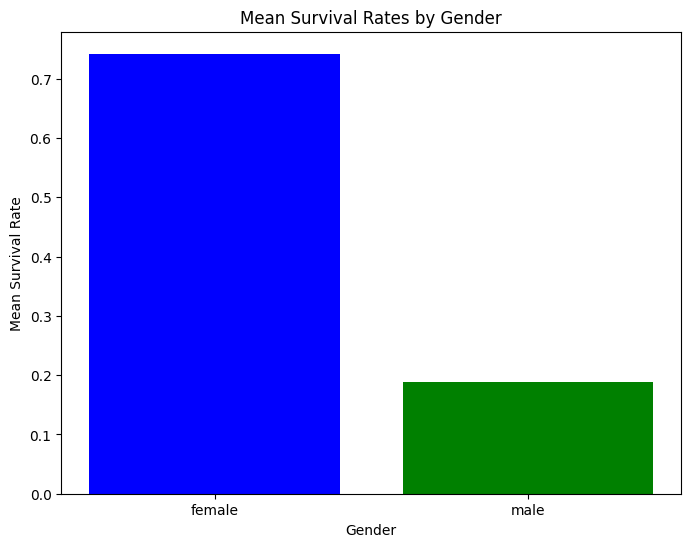

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data/Titanic-Dataset.csv")
import matplotlib.pyplot as plt
mean_survival_by_gender = df.groupby('Sex')['Survived'].mean()
print(mean_survival_by_gender)

# Create a bar plot using Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(mean_survival_by_gender.index, mean_survival_by_gender.values, color=['blue', 'green'])

# Set the title and labels
plt.title('Mean Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Survival Rate')

# Show the plot
plt.show()


Problem - 5:

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg),

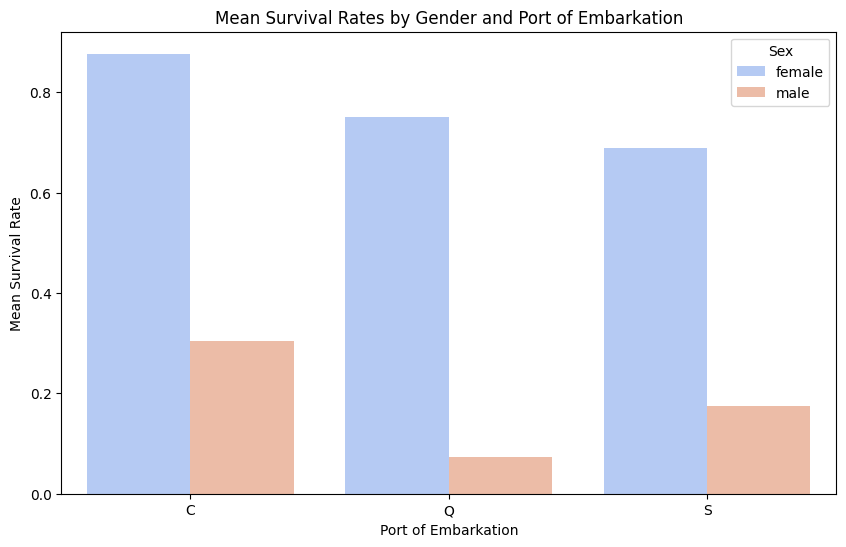

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
df=pd.read_csv("/content/drive/MyDrive/Data/Titanic-Dataset.csv")

# Group by 'Sex' and 'Embarked' and calculate the mean of 'Survived' for each group
mean_survival_by_gender_port = df.groupby(['Sex', 'Embarked'])['Survived'].mean().reset_index()

# Create a bar plot to visualize the survival rates by gender and port of embarkation
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=mean_survival_by_gender_port, palette='coolwarm')

# Set the title and labels
plt.title('Mean Survival Rates by Gender and Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Mean Survival Rate')

# Show the plot
plt.show()